In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.metrics import accuracy_score
%matplotlib inline

In [4]:
df = pd.read_csv('playgolf.csv')
df.head()

Outlook  Temperature  Humidity  Windy      Result
0     sunny           85        85  False  Don't Play
1     sunny           80        90   True  Don't Play
2  overcast           83        78  False        Play
3      rain           70        96  False        Play
4      rain           68        80  False        Play

In [14]:
n = df.shape[0]; n

14

In [23]:
df.Outlook.unique()

array(['sunny', 'overcast', 'rain'], dtype=object)

In [25]:
df['Outlook'] = df.Outlook.map({'sunny':1, 'overcast':2, 'rain':3})

In [26]:
df.head()

Outlook  Temperature  Humidity  Windy      Result
0        1           85        85  False  Don't Play
1        1           80        90   True  Don't Play
2        2           83        78  False        Play
3        3           70        96  False        Play
4        3           68        80  False        Play

In [28]:
trees = []
for i in range(3):
    sample_df = df.sample(n, replace=True)
    y = sample_df.Result
    X = sample_df.iloc[:,0:-1]
    tree = DecisionTreeClassifier().fit(X, y)
    trees.append(tree)

In [29]:
trees

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurit

In [32]:
trees[0].predict(X)

array(['Play', 'Play', 'Play', 'Play', 'Play', 'Play', 'Play', 'Play',
       'Play', 'Play', 'Play', 'Play', 'Play', 'Play'], dtype=object)

In [35]:
predictions = []
for tree in trees:
    prediction = tree.predict(X)
    predictions.append(prediction)

In [47]:
stats.mode(np.array(predictions).T, axis=1)[0].flatten()

array(['Play', 'Play', 'Play', 'Play', 'Play', 'Play', "Don't Play",
       'Play', "Don't Play", 'Play', 'Play', 'Play', "Don't Play", 'Play'],
      dtype=object)

In [49]:
y.values

array(['Play', 'Play', 'Play', 'Play', 'Play', "Don't Play", "Don't Play",
       'Play', "Don't Play", 'Play', "Don't Play", 'Play', "Don't Play",
       'Play'], dtype=object)

In [51]:
accuracy_score(y.values, stats.mode(np.array(predictions).T, axis=1)[0].flatten())

0.8571428571428571

In [88]:
model = RandomForestClassifier(n_estimators=3, max_features=None).fit(X, y)

In [89]:
model.score(X, y)

0.9285714285714286

In [109]:
RandomForestClassifier(n_estimators=1000, max_features='auto').fit(X, y).feature_importances_

array([0.30983188, 0.33910403, 0.25211044, 0.09895364])

In [101]:
gs = GridSearchCV(RandomForestClassifier(), {'n_estimators': [10, 20]}, cv=5, n_jobs=-1).fit(X, y)
gs

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [102]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
gs.best_params_

{'n_estimators': 10}

In [104]:
gs.best_score_

0.7142857142857143

In [106]:
gs.cv_results_

{'mean_fit_time': array([0.02483406, 0.02398992]),
 'std_fit_time': array([0.00665127, 0.00465269]),
 'mean_score_time': array([0.00227375, 0.00221338]),
 'std_score_time': array([0.00039696, 0.00015922]),
 'param_n_estimators': masked_array(data=[10, 20],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10}, {'n_estimators': 20}],
 'split0_test_score': array([1., 1.]),
 'split1_test_score': array([0.33333333, 0.33333333]),
 'split2_test_score': array([1., 1.]),
 'split3_test_score': array([0.66666667, 0.66666667]),
 'split4_test_score': array([0.5, 0.5]),
 'mean_test_score': array([0.71428571, 0.71428571]),
 'std_test_score': array([0.27042421, 0.27042421]),
 'rank_test_score': array([1, 1], dtype=int32)}

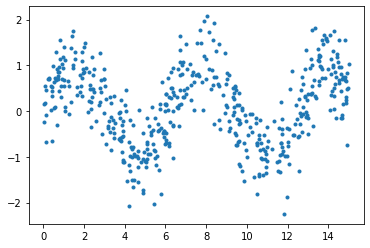

In [126]:
x = stats.uniform(0, 15).rvs(500)
y = np.sin(x) + stats.norm(0, 0.5).rvs(500)
plt.plot(x, y, '.');

In [131]:
model = RandomForestRegressor(n_estimators=500).fit(x.reshape(-1,1), y)

In [134]:
y_hat = model.predict(x.reshape(-1,1))

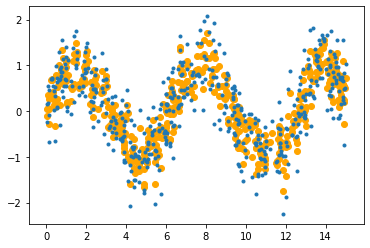

In [139]:
plt.plot(x, y, '.');
plt.scatter(x, y_hat, c='orange')